In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Checking csv Fraud file

In [5]:
df = pd.read_csv("Fraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
df.shape

(6362620, 11)

# Cleaning the data
Droping duplicates values

In [7]:
df = df.drop_duplicates()
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


Droping some columns

In [8]:
columns_to_drop = ['nameOrig', 'nameDest', 'isFlaggedFraud']
df = df.drop(columns=columns_to_drop)


In [9]:
df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1


NameError: name 'd' is not defined

Check if there are null values

In [31]:
df.isnull().sum()
#df.fillna('')

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

Counting how many isFraud the dataset has, 0 means no fraud whereas 1 means fraud

In [32]:
df.isFraud.value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

# Leading with outliers

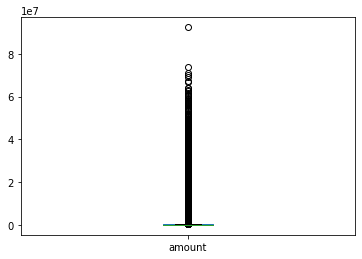

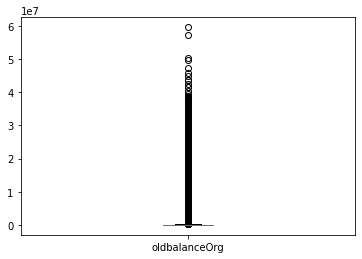

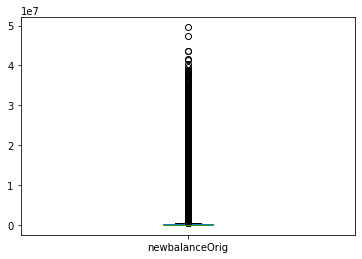

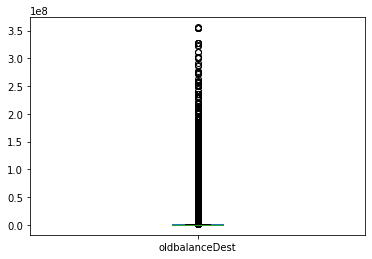

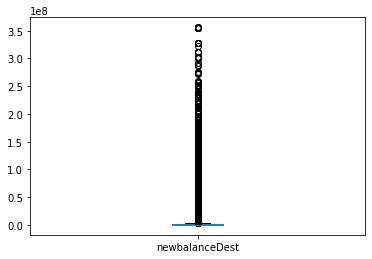

In [33]:
import matplotlib.pyplot as plt

def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

# Assuming df is your DataFrame containing the relevant numerical features
features_to_plot = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]

for feature in features_to_plot:
    plot_boxplot(df, feature)



Removing Outliers

In [34]:
# Define a function called "outliers" whitch returns a list of outliers
# IQR = Q3-Q1
# +/- 1.5*IQR
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR
    
    ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return ls

In [35]:
# Define a list for the features with outliers
index_list = []
for feature in ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]:
    index_list.extend(outliers(df, feature))

In [36]:
index_list

[85,
 86,
 88,
 89,
 93,
 94,
 95,
 96,
 132,
 210,
 289,
 345,
 358,
 359,
 360,
 362,
 365,
 373,
 374,
 375,
 376,
 377,
 378,
 379,
 380,
 382,
 383,
 411,
 465,
 552,
 656,
 695,
 794,
 795,
 797,
 798,
 800,
 801,
 802,
 830,
 841,
 842,
 865,
 969,
 970,
 986,
 1077,
 1153,
 1154,
 1156,
 1157,
 1158,
 1159,
 1162,
 1163,
 1164,
 1202,
 1206,
 1207,
 1209,
 1211,
 1213,
 1214,
 1227,
 1228,
 1229,
 1231,
 1433,
 1699,
 1703,
 1718,
 1719,
 1783,
 1785,
 1786,
 1787,
 1788,
 1789,
 1791,
 1818,
 1819,
 1823,
 1837,
 1844,
 1862,
 1908,
 2149,
 2159,
 2188,
 2213,
 2223,
 2247,
 2291,
 2338,
 2487,
 2504,
 2523,
 2566,
 2586,
 2587,
 2588,
 2591,
 2593,
 2595,
 2755,
 2895,
 3059,
 3060,
 3162,
 3163,
 3313,
 3341,
 3342,
 3344,
 3345,
 3346,
 3350,
 3351,
 3353,
 3354,
 3557,
 3558,
 3560,
 3561,
 3562,
 3563,
 3567,
 3570,
 3573,
 3574,
 3628,
 3676,
 3922,
 4031,
 4150,
 4151,
 4152,
 4155,
 4156,
 4157,
 4159,
 4160,
 4163,
 4164,
 4168,
 4327,
 4440,
 4441,
 4442,
 4443,
 448

In [37]:
# Define a function "remove" to returne cleaned  dataframe without outliers

def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df


In [38]:
df_cleaned = remove(df, index_list)

In [39]:
df_cleaned

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...,...
6362605,742,CASH_OUT,54652.46,54652.46,0.00,0.00,54652.46,1
6362608,742,TRANSFER,258355.42,258355.42,0.00,0.00,0.00,1
6362609,742,CASH_OUT,258355.42,258355.42,0.00,25176.67,283532.09,1
6362610,742,TRANSFER,63416.99,63416.99,0.00,0.00,0.00,1


Applying Standardization

In [44]:
# Import necessary libraries
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Encoding categorical variables
df_cleaned = pd.get_dummies(df_cleaned, columns=['type'])
#from sklearn import preprocessing
#label_encoder=preprocessing.LabelEncoder()
#df_cleaned['type'] = label_encoder.fit_transform(df_cleaned['type'])
# Split the data into features and target variable
X = df_cleaned.drop('isFraud', axis=1)
y = df_cleaned['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a machine learning algorithm RandomForestClassifier()
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Test accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)




Accuracy: 0.9996938443363479


In [ ]:
# Comparing actual fraud with predictions 
df = pd.DataFrame({"Actual":y_test,"predicted":predictions})
print(df.head(10))

In [ ]:
RandomForestClassifier often provides better performance compared to a single decision tree. This is because 
it builds multiple decision trees and combines their predictions through
voting or averaging,

In [ ]:
confusion matrix
site exampple https://rpubs.com/Argaadya/crispr_dm